![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [6]:
# Start coding here
# Use as many cells as you need
import pandas as pd
import matplotlib.pyplot as plt
sleep = pd.read_csv("sleep_health_data.csv")
sleep.head()

Matplotlib is building the font cache; this may take a moment.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# intital questions to answer 
what's the average sleep duration for the people in the data set? DONE

what's the average of sleep for males? DONE

what's the average of sleep for females?DONE

I want to know the distributaion of sleep duration, is everyone mostly sleeping fine? DONE
how does sleep associate with other facotrs such as occupation = DONE, stress = DONE , blood pressure,quality of sleep, exercise?

does weight have a corilataion with sleep quality or duration, how big of an impact does it have 



**what's the average sleep duration for the males and females in the data set **

In [ ]:
sleep.groupby("Gender")["Sleep Duration"].mean().round(2)

Gender
Female    7.23
Male      7.04
Name: Sleep Duration, dtype: float64

In [ ]:
#overall average
sleep["Sleep Duration"].mean().round(2)

7.13

# So most people are getting on average 7 hours of sleep which is good!

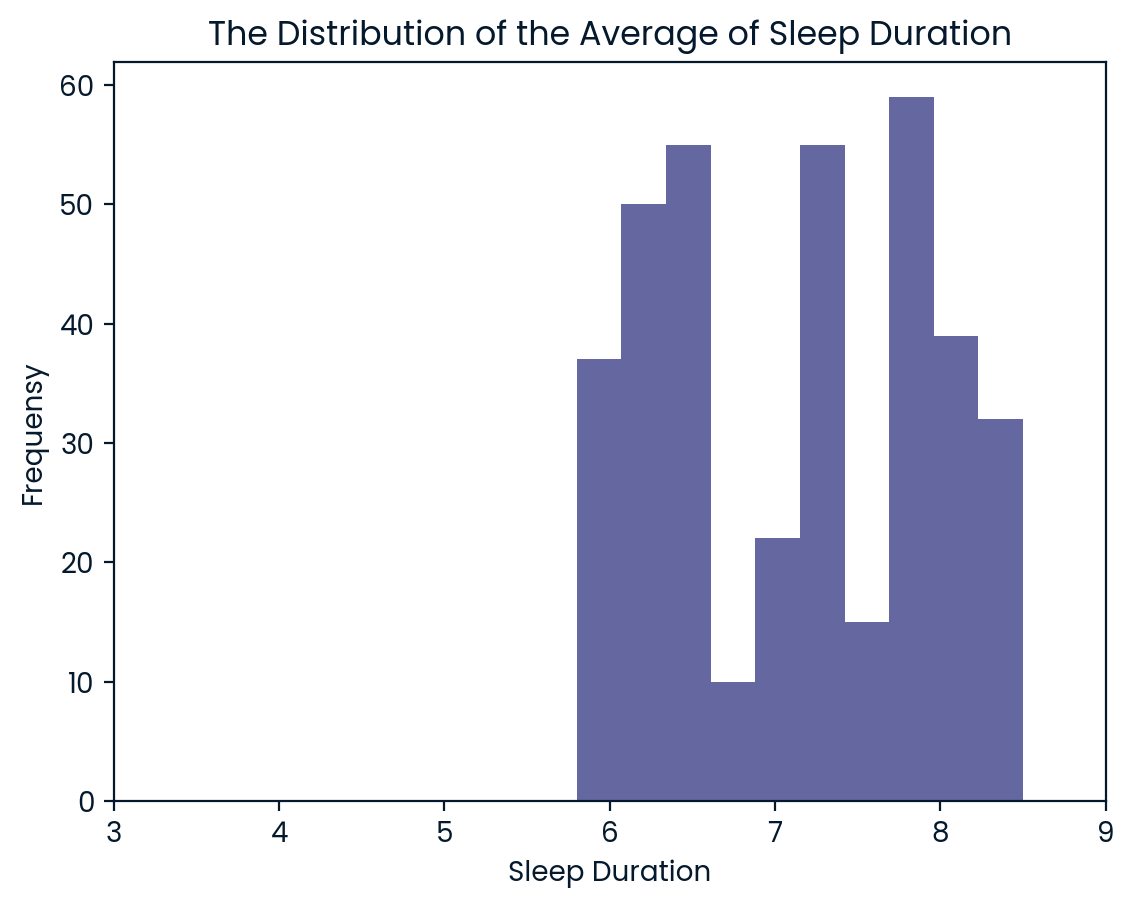

In [ ]:
plt.hist(sleep["Sleep Duration"],bins =10)
plt.xlim(3,9)
plt.xlabel("Sleep Duration")
plt.ylabel("Frequensy")
plt.title("The Distribution of the Average of Sleep Duration")
plt.show()


_referring the above histogram of that shows the distribution of the Sleep Duration in the data set, it seems like the dataset follows a bimodel where we have 2 disticnt ranges the values are grouped in which is between 5.9-7hours and 7.5-8.5 hours of sleep.
to answer the question above "is most poeple sleeping fine?" about 2/3 of the people are getting 7 hours of sleep and more which suggests that, the Answer is yes! most people are sleeping fine.

# -----------------------------------------------------------------------------------------------------

In [ ]:
# To see the grouped data, you need to apply an aggregation function or convert it to a DataFrame
sleep_occ = sleep.groupby("Occupation")["Sleep Duration"].mean().sort_values()
sleep_occ

Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Manager                 6.900000
Doctor                  6.970423
Nurse                   7.063014
Accountant              7.113514
Lawyer                  7.410638
Engineer                7.987302
Name: Sleep Duration, dtype: float64

In [ ]:
lowestSleepOcc = sleep_occ.head(5)

In [ ]:
highSleepOcc = sleep_occ.sort_values(ascending = False).head(5)
highSleepOcc

Occupation
Engineer      7.987302
Lawyer        7.410638
Accountant    7.113514
Nurse         7.063014
Doctor        6.970423
Name: Sleep Duration, dtype: float64

In [ ]:
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


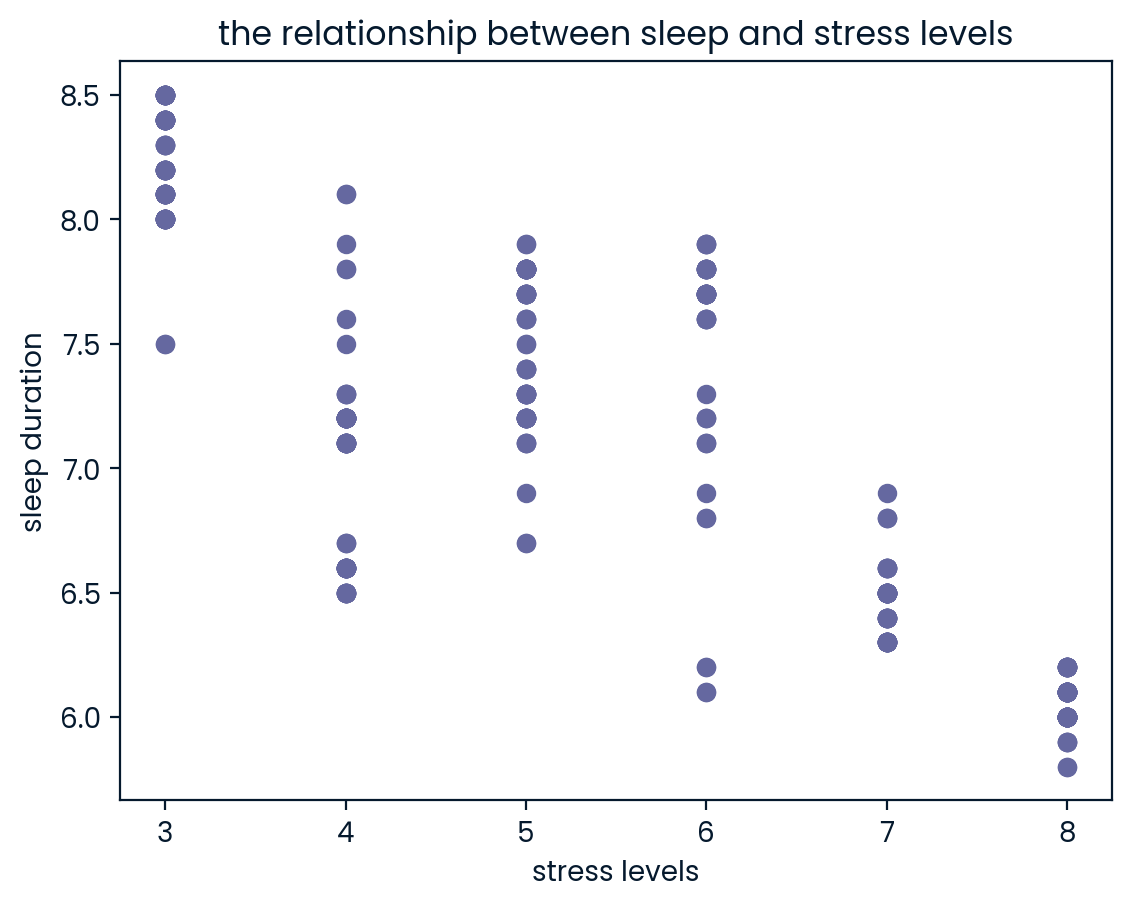

In [ ]:
Strsleep = sleep.loc[:,["Person ID","Sleep Duration","Stress Level"]]
Strsleep.sort_values(by = "Stress Level" ,ascending = False)
plt.scatter(sleep["Stress Level"],sleep["Sleep Duration"])
plt.xlabel("stress levels")
plt.ylabel("sleep duration")
plt.title("the relationship between sleep and stress levels")
plt.show()

# higher stress levels means less sleep time as shown in the above scatter plot, people with highe stress levels sleep the lowest!

In [ ]:
sleep.groupby("BMI Category")["Sleep Duration","Quality of Sleep","Stress Level"].mean().round(2)

,Sleep Duration,Quality of Sleep,Stress Level
BMI Category,,,
Normal,7.39,7.64,5.13
Obese,6.96,6.40,5.70
Overweight,6.77,6.90,5.73


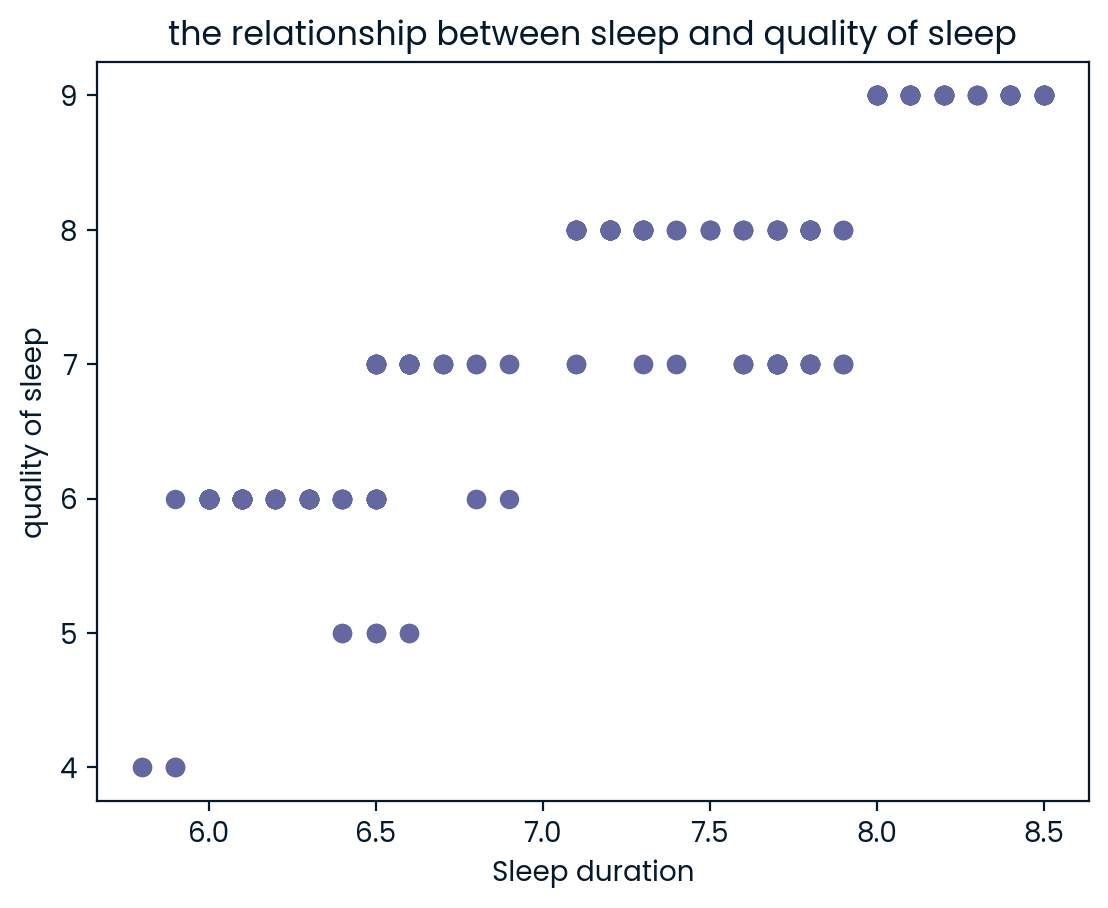

In [ ]:
qsleep = sleep.loc[:,["Sleep Duration","Quality of Sleep"]]
qsleep.sort_values(by="Quality of Sleep")
plt.scatter(sleep["Sleep Duration"],sleep["Quality of Sleep"])
plt.xlabel("Sleep duration")
plt.ylabel("quality of sleep")
plt.title("the relationship between sleep and quality of sleep")
plt.show()

In [ ]:
lowest_sleep_occ = sleep_occ.idxmin()
lowest_sleep_occ

'Sales Representative'

In [ ]:
sleepQ = sleep.groupby("Occupation")["Quality of Sleep"].mean().round(2)
sleepQ.sort_values(inplace=True)
sleepQ

Occupation
Sales Representative    4.00
Scientist               5.00
Salesperson             6.00
Software Engineer       6.50
Doctor                  6.65
Teacher                 6.98
Manager                 7.00
Nurse                   7.37
Accountant              7.89
Lawyer                  7.89
Engineer                8.41
Name: Quality of Sleep, dtype: float64

In [ ]:
lowest_sleep_quality_occ = sleepQ.idxmin()
lowest_sleep_quality_occ

'Sales Representative'

In [ ]:
same_occ = True

In [ ]:
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
 sleep.groupby("BMI Category")["Sleep Disorder"].value_counts()



BMI Category  Sleep Disorder
Normal        None              200
              Insomnia            9
              Sleep Apnea         7
Obese         Sleep Apnea         6
              Insomnia            4
Overweight    Sleep Apnea        65
              Insomnia           64
              None               19
Name: Sleep Disorder, dtype: int64

In [ ]:
toatalins = sleep[sleep["Sleep Disorder"] == "Insomnia"].shape[0]
print(toatalins,tot)

77 77


In [ ]:
bmi_insomnia = {"Normal":Ninso,
              "Overwieght":Winso,
              "Obese":Binso}


In [ ]:
bmi_insomnia_ratioss = { 
    category:count/toatalins
    for category,count in bmi_insomnia.items()
}
bmi_insomnia_ratioss

{'Normal': 0.11688311688311688,
 'Overwieght': 0.8311688311688312,
 'Obese': 0.05194805194805195}

In [ ]:
bmi_insomnia_ratios= {
    k:round(v,2) for k,v in bmi_insomnia_ratioss.items()
}
bmi_insomnia_ratios

{'Normal': 0.12, 'Overwieght': 0.83, 'Obese': 0.05}